**Entrenamiento de un perceptrón multicapa utilizando el ejemplo de la operación lógica XOR.**

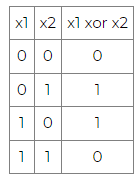

Para resolver este problema, necesitarás crear un perspron multicapa del siguiente tipo:

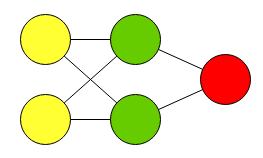

In [4]:
import torch
from torch import nn
from torchsummary import summary

# Detect device
tensor_device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu') 

**Preparando datos de entrenamiento**

In [5]:
data_train = [
		{ "in": [0, 0], "out": [0] },
		{ "in": [0, 1], "out": [1] },
		{ "in": [1, 0], "out": [1] },
		{ "in": [1, 1], "out": [0] },
]

# Esta es una serie de preguntas y respuestas correctas

Hagamos dos operaciones de mapa que transformen la matriz *data_train* por separado en una matriz de preguntas y respuestas.

In [6]:
tensor_train_x = list(map(lambda item: item["in"], data_train))
tensor_train_y = list(map(lambda item: item["out"], data_train))

Convierta a un tensor float32 en tensor_device.

In [7]:
tensor_train_x = torch.tensor(tensor_train_x).to(torch.float32).to(tensor_device)
tensor_train_y = torch.tensor(tensor_train_y).to(torch.float32).to(tensor_device)

In [8]:
print ("Input:")
print (tensor_train_x)
print ("Shape:", tensor_train_x.shape) # dimensión vectorial
print ("")
print ("Answers:")
print (tensor_train_y)
print ("Shape:", tensor_train_y.shape) # dimensión vectorial

Input:
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
Shape: torch.Size([4, 2])

Answers:
tensor([[0.],
        [1.],
        [1.],
        [0.]])
Shape: torch.Size([4, 1])


**Creando un modelo de red neuronal**

La arquitectura de la red neuronal será la siguiente.

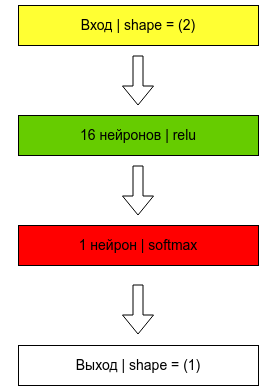

Crea un modelo:

In [10]:
input_shape = 2
output_shape = 1

model = nn.Sequential(
	nn.Linear(input_shape, 16),
	nn.ReLU(),
	nn.Linear(16, output_shape)
)

summary(model, (input_shape,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 16]              48
              ReLU-2                   [-1, 16]               0
            Linear-3                    [-1, 1]              17
Total params: 65
Trainable params: 65
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


Establezcamos parámetros de optimización para el modelo:

In [11]:
# Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, betas=(0.9, 0.99))

# mean squared error
loss = nn.MSELoss()

# Batch size
batch_size = 2

# Epochs
epochs = 1000

In [12]:
summary(model, (input_shape,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 16]              48
              ReLU-2                   [-1, 16]               0
            Linear-3                    [-1, 1]              17
Total params: 65
Trainable params: 65
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


**Entrenamiento de redes neuronales**

In [13]:
history = []

# Movamos el modelo al dispositivo
model = model.to(tensor_device)

for i in range(epochs):
	
	# Calculemos el resultado del modelo
	model_res = model(tensor_train_x)
	
	# Encontremos el valor de error entre la respuesta del modelo y las respuestas correctas
	loss_value = loss(model_res, tensor_train_y)
	
	# Agreguemos el valor del error al historial para mostrarlo más en el gráfico
	loss_value_item = loss_value.item()
	history.append(loss_value_item)
	
	# Calculemos el gradiente
	optimizer.zero_grad()
	loss_value.backward()
	
	# Optimizamos
	optimizer.step()
	
	# Detenga el entrenamiento si el error es inferior a 0,01
	if loss_value_item < 0.01:
		break
	
	# Información de depuración
	if i % 10 == 0:
		print (f"{i+1},\t loss: {loss_value_item}")
	
	# Borrar el caché CUDA
	if torch.cuda.is_available():
		torch.cuda.empty_cache()

1,	 loss: 0.3002921938896179
11,	 loss: 0.280201256275177
21,	 loss: 0.2648681402206421
31,	 loss: 0.25279533863067627
41,	 loss: 0.24257561564445496
51,	 loss: 0.23357096314430237
61,	 loss: 0.2262974977493286
71,	 loss: 0.21943429112434387
81,	 loss: 0.21269060671329498
91,	 loss: 0.206145778298378
101,	 loss: 0.1997915357351303
111,	 loss: 0.19371742010116577
121,	 loss: 0.18767960369586945
131,	 loss: 0.18162183463573456
141,	 loss: 0.17554208636283875
151,	 loss: 0.16935119032859802
161,	 loss: 0.16306263208389282
171,	 loss: 0.1566377729177475
181,	 loss: 0.15009671449661255
191,	 loss: 0.1434110701084137
201,	 loss: 0.13657203316688538
211,	 loss: 0.12959036231040955
221,	 loss: 0.12253217399120331
231,	 loss: 0.11537770926952362
241,	 loss: 0.10826165974140167
251,	 loss: 0.1011451706290245
261,	 loss: 0.0940333753824234
271,	 loss: 0.08700767159461975
281,	 loss: 0.08012087643146515
291,	 loss: 0.0734279453754425
301,	 loss: 0.06690651178359985
311,	 loss: 0.06061666086316109


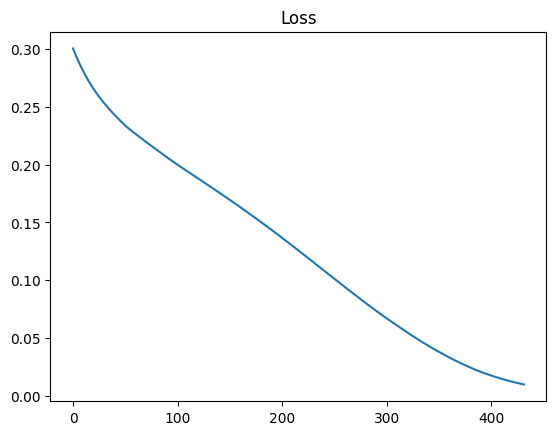

In [15]:
import matplotlib.pyplot as plt

plt.plot(history)
plt.title('Loss')
plt.show()

**Implementación de una red neuronal**

In [20]:
control_x = [
	[0, 0],
	[0, 1],
	[1, 0],
	[1, 1],
]

control_x = torch.tensor(control_x).to(torch.float32).to(tensor_device)

print ("Shape:", control_x.shape)

answer = model( control_x )

for i in range(len(answer)):
	print(control_x[i].tolist(), "->", answer[i].round().tolist())

Shape: torch.Size([4, 2])
[0.0, 0.0] -> [0.0]
[0.0, 1.0] -> [1.0]
[1.0, 0.0] -> [1.0]
[1.0, 1.0] -> [0.0]


Se puede observar que la red neuronal responde **correctamente**.